### <p align=center> **EDA - EXPLORATORY DATA ANALYSIS** <p>

In [31]:
#We import the libraries that we will use

import pandas as pd

from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt

import seaborn as sns 

%matplotlib inline 

### **EXPLORATORY ANALYSIS : FILM DATASET** <p>

In [32]:
# We import the dataset
movies_df = pd.read_csv("df_total_data.csv")

In [33]:
# We verify the number of rows and columns of our dataset
print(f"There ara {movies_df.shape[0]} rows and  {movies_df.shape[1]} columns ")

There ara 22998 rows and  15 columns 


In [34]:
# We show the first rows of the dataset to visualize it
movies_df.head()

,movieId,score_prom,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,platform
0,as1,3.47,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113.0,min,amazon
1,as10,3.44,movie,david's mother,robert allan ackerman,"kirstie alley, sam waterston, stockard channing",united states,2021-04-01,1994,g,drama,sally goodson is a devoted mother to her autis...,92.0,min,amazon
2,as100,3.61,movie,wilder napalm,glenn gordon caron,"debra winger, dennis quaid, arliss howard, m. ...",NaN,NaN,1993,pg-13,"comedy, science fiction",two brothers with the secret power of starting...,109.0,min,amazon
3,as1000,3.56,movie,sinbad: make me wanna holla,jay chapman,sinbad,NaN,NaN,2014,16+,"arts, entertainment, and culture, comedy, docu...",watch the all-out stand-up special featuring a...,90.0,min,amazon
4,as1001,3.59,movie,simple gifts: the chamber music society at sha...,habib azar,NaN,NaN,NaN,2016,g,documentary,a,84.0,min,amazon


In [35]:
# Let's see the number of nulls per column
movies_df.isnull().sum()

movieId              0
score_prom           0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
listed_in            0
description          4
duration_int       482
duration_type      482
platform             0
dtype: int64

In [36]:
# Observation : As we can see, there is no mostly null row, so It would not be 
#               correct to remove nulls from the dataset.

### <p align=center> We make a histogram <p>

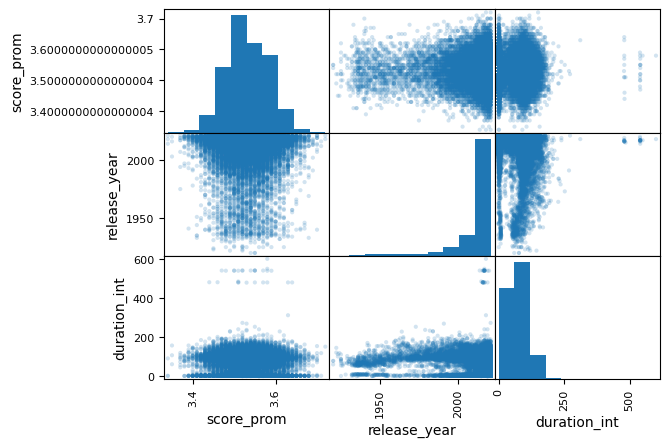

In [37]:
# Scatter plot between several columns
pd.plotting.scatter_matrix(movies_df, alpha=0.2)

plt.show()

In [38]:
# We identify duplicate values
movies_df.duplicated().sum()

0

In [39]:
# Observation : as we can see there are no duplicate values ​​in our dataset

### <p align=center> Movie dataset overview <p>

In [40]:
# we make a profile report to our dataset
prof_movies = ProfileReport(movies_df)

prof_movies

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **EXPLORATORY ANALYSIS : SCORES DATASET** 

In [41]:
# ADVICE : Now we are going to focus our attention on the dataset of scores
#          since it is the dataset that we will use to a greater extent to do our
#          recommendation system later

In [42]:
# We open the scores dataset
scores_df = pd.read_csv("Datasets_Score/df_total_score.csv")

In [43]:
# Let's see the number of columns and rows in the dataset
print(f"There are {scores_df.shape[0]} rows and {scores_df.shape[1]} columns")

There are 375000 rows and 4 columns


In [44]:
# Let's review the first 5 rows of our dataset to have them as an example
scores_df.head()

,userId,rating,timestamp,movieId
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186
2,1,5.0,2015-03-09,hs2381
3,1,5.0,2015-03-09,ns3663
4,1,5.0,2015-03-09,as9500


In [45]:
print(f"There are {len(scores_df['userId'].unique())} unique users")

There are 3967 unique users


In [46]:
# Observation : We wonder how many movies each user has rated

In [47]:
#Number of movies that the user has rated
scores_by_users = scores_df.groupby(['userId']).count()

scores_by_users.head()

,rating,timestamp,movieId
userId,,,
1,27,27,27
2,22,22,22
3,10,10,10
4,62,62,62
5,26,26,26


In [48]:
# Let's look at the data types
scores_df.dtypes

userId         int64
rating       float64
timestamp     object
movieId       object
dtype: object

### <p align=center> Dataset null values <p>

In [49]:
scores_df.isnull().sum()

userId       0
rating       0
timestamp    0
movieId      0
dtype: int64

In [50]:
# Observation : We can see the dataset does not have any null value

### <p align=center> Duplicate values <p>

In [51]:
print(f"There are {scores_df.duplicated().sum()} duplicate values")

There are 267 duplicate values


In [52]:
# Observation 1 : To improve processing time when building our model 
#                 predictive later, we will make a change in the type 
#                 of some variables.

In [53]:
# Observation 2 : We will change the type of the userId variables to int32 and to 
#                 score to a float16 (since it takes decimal values ​​between 1 and 5)

In [54]:
import numpy as np

In [55]:
scores_df.userId=scores_df.userId.astype(np.int32)

scores_df.rating=scores_df.rating.astype(np.float16)

scores_df.dtypes

userId         int32
rating       float16
timestamp     object
movieId       object
dtype: object

In [56]:
print(f"Now there are {scores_df.duplicated().sum()} duplicate values")

Now there are 267 duplicate values


### <p align=center> We save our dataset<p>

In [57]:
scores_df.to_csv("Datasets_Score/df_total_score.csv", index=False)

### <p align=center> Overview dataset scores <p>

In [58]:
# We open the scores dataset

In [59]:
# We make a profile report of the dataset
prof_scores = ProfileReport(scores_df)

prof_scores

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]